In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# 加载加利福尼亚房价数据集
housing = fetch_california_housing()

# 转换为DataFrame格式
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target

# 查看数据基本信息
print("数据集特征:", housing.feature_names)
print("数据集形状:", X.shape)
print("\n数据集描述:")
print(X.describe())


数据集特征: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
数据集形状: (20640, 8)

数据集描述:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
count  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704  
std   

In [4]:
# 数据预处理
# 1. 检查是否有缺失值
print("\n检查缺失值:")
print(X.isnull().sum())

# 2. 特征标准化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# 3. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("\n预处理后训练集形状:", X_train.shape)
print("预处理后测试集形状:", X_test.shape)



检查缺失值:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

预处理后训练集形状: (16512, 8)
预处理后测试集形状: (4128, 8)


In [8]:
# 训练线性回归模型
from sklearn.linear_model import LinearRegression

# 创建并训练模型
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = lr_model.predict(X_test)

# 评估模型性能
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("模型性能评估:")
print(f"均方误差 (MSE): {mse:.4f}")
print(f"决定系数 (R²): {r2:.4f}")

# 查看各特征的系数
feature_importance = pd.DataFrame({
    '特征': X.columns,
    '系数': lr_model.coef_
})
print("\n特征系数:")
print(feature_importance.sort_values(by='系数', ascending=False))


模型性能评估:
均方误差 (MSE): 0.5559
决定系数 (R²): 0.5758

特征系数:
           特征        系数
0      MedInc  0.852382
3   AveBedrms  0.371132
1    HouseAge  0.122382
4  Population -0.002298
5    AveOccup -0.036624
2    AveRooms -0.305116
7   Longitude -0.868927
6    Latitude -0.896635


In [10]:
# 使用随机梯度下降(SGD)训练带正则化的线性回归模型
from sklearn.linear_model import SGDRegressor

# 创建SGD回归器,使用L2正则化
sgd_model = SGDRegressor(
    loss='squared_error',  # 损失函数:均方误差
    penalty='l2',         # L2正则化
    alpha=0.0001,        # 正则化强度
    max_iter=1000,       # 最大迭代次数
    tol=1e-3,           # 收敛阈值
    random_state=42
)

# 训练模型
sgd_model.fit(X_train, y_train)

# 在测试集上预测
y_pred_sgd = sgd_model.predict(X_test)

# 评估SGD模型性能
mse_sgd = mean_squared_error(y_test, y_pred_sgd)
rmse_sgd = np.sqrt(mse_sgd)
r2_sgd = r2_score(y_test, y_pred_sgd)

print("SGD模型性能评估:")
print(f"均方误差 (MSE): {mse_sgd:.4f}")
print(f"均方根误差 (RMSE): {rmse_sgd:.4f}")
print(f"决定系数 (R²): {r2_sgd:.4f}")

# 查看SGD模型各特征的系数
feature_importance_sgd = pd.DataFrame({
    '特征': X.columns,
    '系数': sgd_model.coef_
})
print("\nSGD模型特征系数:")
print(feature_importance_sgd.sort_values(by='系数', ascending=False))


SGD模型性能评估:
均方误差 (MSE): 26659.3544
均方根误差 (RMSE): 163.2769
决定系数 (R²): -20343.3008

SGD模型特征系数:
           特征          系数
2    AveRooms   94.139401
4  Population   59.243606
1    HouseAge   11.458327
0      MedInc  -37.833382
3   AveBedrms  -57.062947
7   Longitude  -73.609301
6    Latitude  -79.468158
5    AveOccup -943.869682


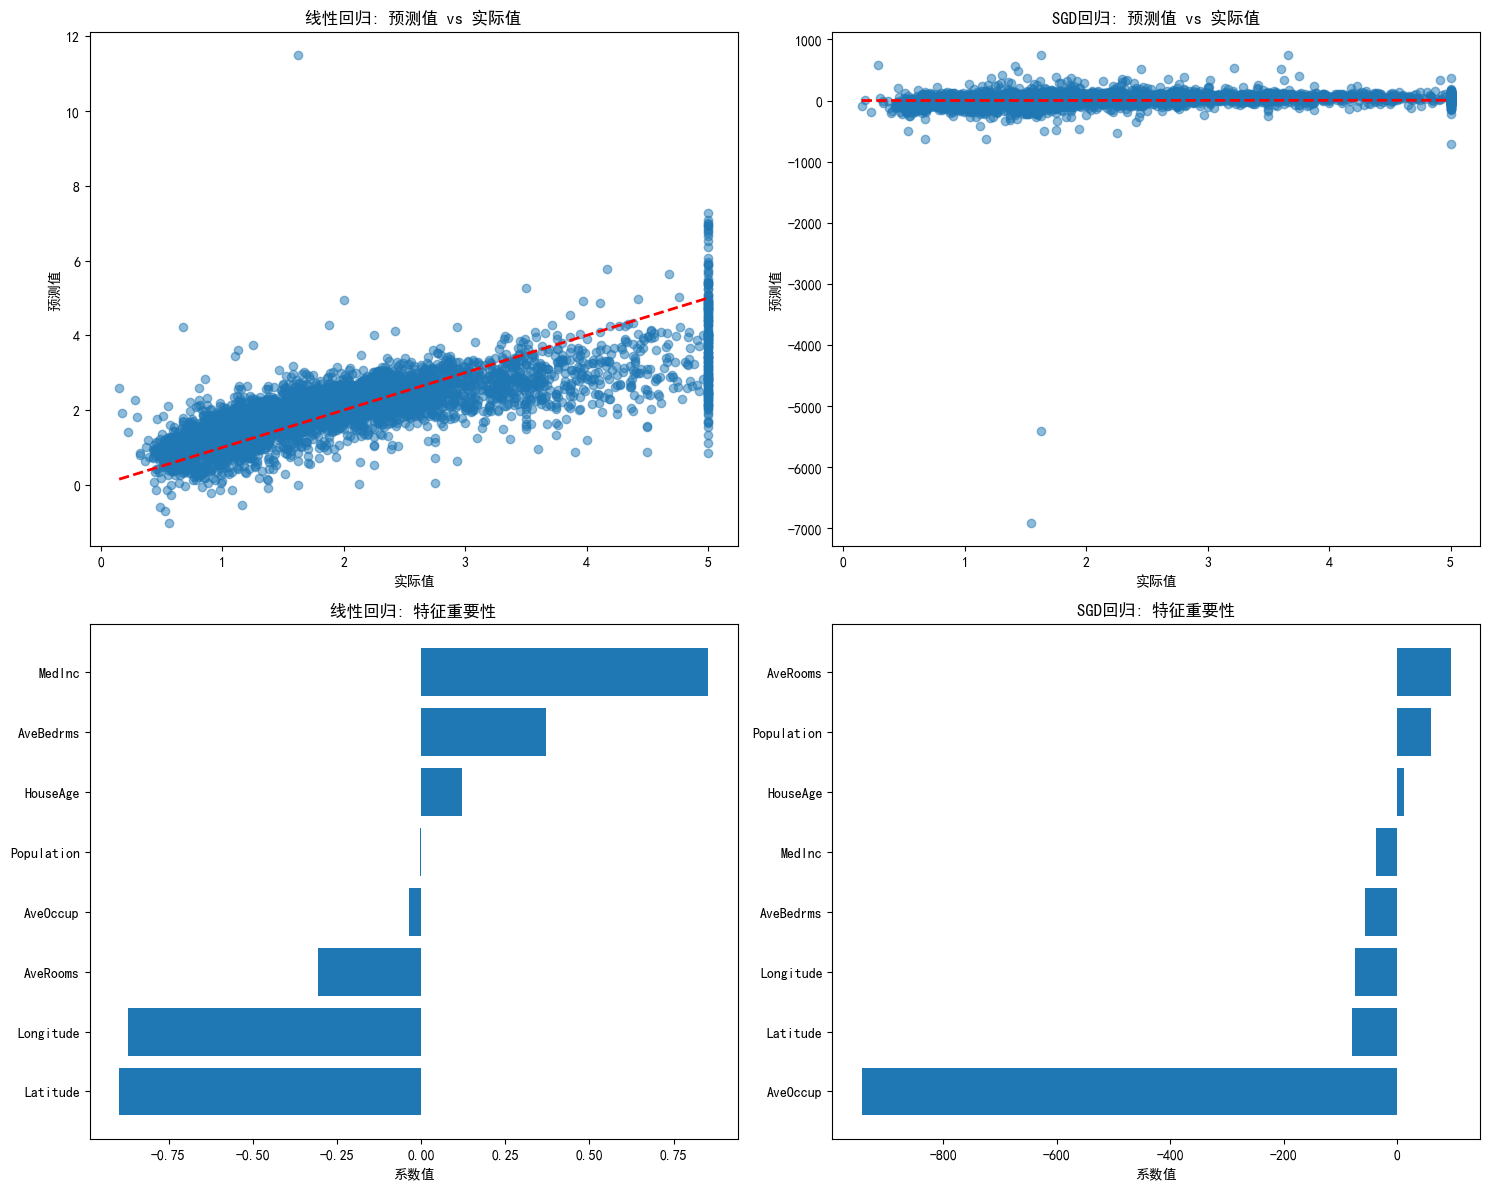

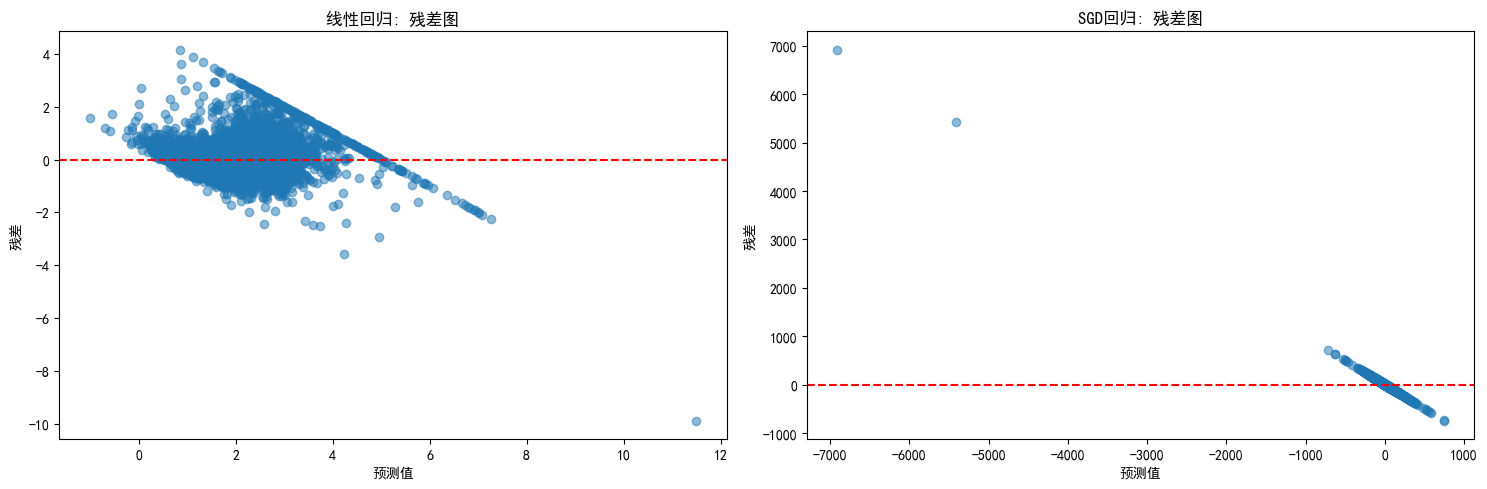

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 创建图形和子图
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. 预测值vs实际值散点图 (普通线性回归)
axes[0,0].scatter(y_test, y_pred, alpha=0.5)
axes[0,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0,0].set_xlabel('实际值')
axes[0,0].set_ylabel('预测值')
axes[0,0].set_title('线性回归: 预测值 vs 实际值')

# 2. 预测值vs实际值散点图 (SGD)
axes[0,1].scatter(y_test, y_pred_sgd, alpha=0.5)
axes[0,1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0,1].set_xlabel('实际值')
axes[0,1].set_ylabel('预测值')
axes[0,1].set_title('SGD回归: 预测值 vs 实际值')

# 3. 特征重要性条形图 (普通线性回归)
feature_importance_sorted = feature_importance.sort_values(by='系数', ascending=True)
axes[1,0].barh(feature_importance_sorted['特征'], feature_importance_sorted['系数'])
axes[1,0].set_xlabel('系数值')
axes[1,0].set_title('线性回归: 特征重要性')

# 4. 特征重要性条形图 (SGD)
feature_importance_sgd_sorted = feature_importance_sgd.sort_values(by='系数', ascending=True)
axes[1,1].barh(feature_importance_sgd_sorted['特征'], feature_importance_sgd_sorted['系数'])
axes[1,1].set_xlabel('系数值')
axes[1,1].set_title('SGD回归: 特征重要性')

# 调整布局
plt.tight_layout()
plt.show()

# 残差分析
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 普通线性回归残差图
residuals = y_test - y_pred
axes[0].scatter(y_pred, residuals, alpha=0.5)
axes[0].axhline(y=0, color='r', linestyle='--')
axes[0].set_xlabel('预测值')
axes[0].set_ylabel('残差')
axes[0].set_title('线性回归: 残差图')

# SGD残差图
residuals_sgd = y_test - y_pred_sgd
axes[1].scatter(y_pred_sgd, residuals_sgd, alpha=0.5)
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_xlabel('预测值')
axes[1].set_ylabel('残差')
axes[1].set_title('SGD回归: 残差图')

plt.tight_layout()
plt.show()
